In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

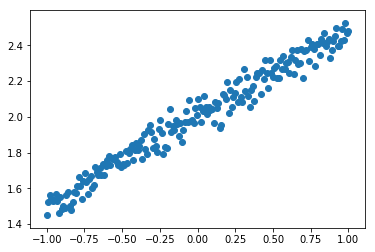

In [4]:
np.random.seed(1337) #每次生成的随机数数值固定，方便复现。

# 生成一些数据
X = np.linspace(-1, 1, 200) #生成200个间隔相同的-1到1之间的数值
np.random.shuffle(X) #打乱数值的顺序
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, ))
# 画出这些数据
plt.scatter(X, Y)
plt.show()

training start..................
train_loss is 4.2323303
train_loss is 0.14535749
train_loss is 0.02252509
train_loss is 0.007393159
train_loss is 0.0038293363
train_loss is 0.002928387
testing start....................
40/40 [==============================] - 0s 1ms/step
test loss is 0.003331510815769434
weight is  [[0.46157956]] 
bias is [2.0033393]


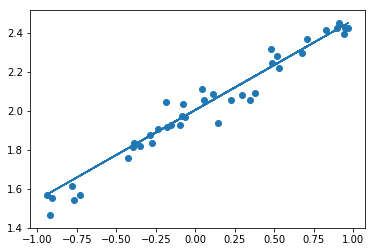

In [14]:
# 分成训练和测试数据集
X_train, Y_train = X[:160], Y[:160] #前160个数据
X_test, Y_test = X[160:], Y[160:] #后40个数据

# 建立一层网络
model = Sequential()
model.add(Dense(units=1, input_dim=1))  # Dense全连接层(units=输出维度，input_dim=输入维度)
 
# 选择损失函数和优化方法
model.compile(loss='mse', optimizer='sgd')  # compile是用来编译的方法,指定损失函数，优化方法(loss, optimizer, metrics=['accuracy'])

# 训练
print('training start..................')
for step in range(501):
    train_cost = model.train_on_batch(X_train, Y_train) # 分批训练
    if step % 100 == 0:
        print("train_loss is", train_cost)

# 测试
print('testing start....................')
test_cost = model.evaluate(X_test, Y_test, batch_size=40) # 模型评估
print('test loss is',test_cost)
w,b = model.layers[0].get_weights() # 查看第0层的参数（权重和偏置）
print('weight is ', w, '\nbias is', b)

# 画出预测曲线
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()

![](keras.png)